# Yash Behare
### 33207,TE-IT
### PICT Pune

# Customer Segmentation
Customer Segmentation is a popular application of unsupervised learning. Using
clustering, identify segments of customers to target the potential user base. They divide
customers into groups according to common characteristics like gender, age, interests,
and spending habits so they can market to each group effectively.

Use K-means clustering and also visualize the gender and age distributions. Then
analyze their annual incomes and spending scores.

Language: Python (or) R
Dataset/Package: (https://drive.google.com/file/d/19BOhwz52NUY3dg8XErVYglctpr5sjTy4/view)

### K means
Specify number of clusters K.
Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [140]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Dropping CustomerID as it will not be required for data processing

In [142]:
df.drop(["CustomerID"], axis = 1, inplace=True)
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


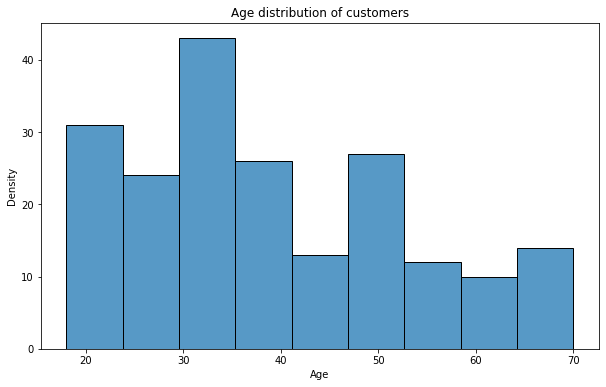

In [190]:
plt.figure(figsize=(10,6))
plt.title("Age distribution of customers")
sns.axes_style('dark')
sns.histplot(df["Age"])#distribution plot
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

C:\Users\yashb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


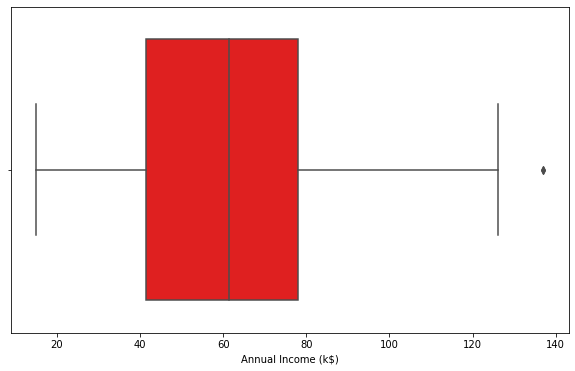

In [195]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Annual Income (k$)'], color='red')
plt.show()

C:\Users\yashb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


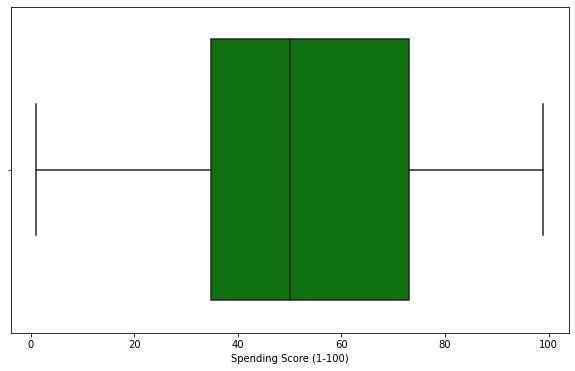

In [145]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Spending Score (1-100)'], color='g')
plt.show()

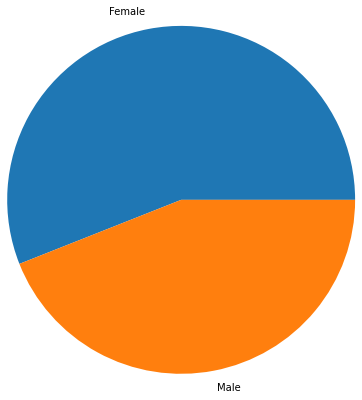

Female    112
Male       88
Name: Genre, dtype: int64


In [146]:
count = df.Genre.value_counts()
plt.pie(count, labels=['Female','Male'], radius=2)
plt.show()
print(count)

In [147]:
#Change data type to category
df['Genre'] = df['Genre'].astype('category')
#Do categorical encoding of data's
df['Genre'] = df['Genre'].cat.codes
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


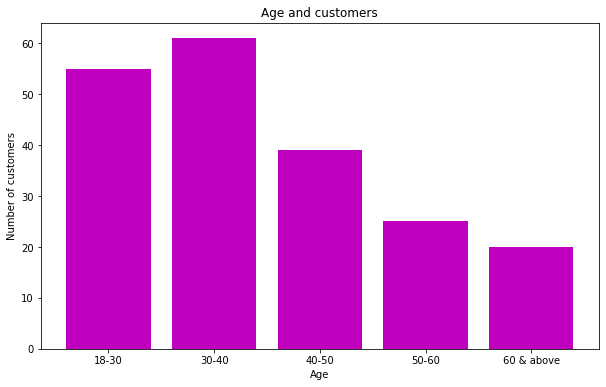

In [201]:
age18_30 = df.Age[(df.Age >=18) & (df.Age< 30)]
age30_40 = df.Age[(df.Age >=30) & (df.Age< 40)]
age40_50 = df.Age[(df.Age >=40) & (df.Age< 50)]
age50_60 = df.Age[(df.Age >=50) & (df.Age< 60)]
age_60_above = df.Age[(df.Age >=60)]

x = ["18-30","30-40","40-50","50-60","60 & above"]
y = [len(age18_30), len(age30_40),len(age40_50), len(age50_60),len(age_60_above)]

plt.figure(figsize = (10,6))
plt.bar(x,y, color='m')
plt.title('Age and customers')
plt.xlabel('Age')
plt.ylabel('Number of customers')
plt.show()

Next I plotted Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value. WCSS measures sum of distances of observations from their cluster centroids which is given by the below formula :
# $ \ {WCSS} = \sum \limits (X_{i} - Y_{i})^2 $
where Yi is centroid for observation Xi. The main goal is to maximize number of clusters and in limiting case each data point becomes its own cluster centroid.

In [204]:
len(age18_30)

55

C:\Users\yashb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


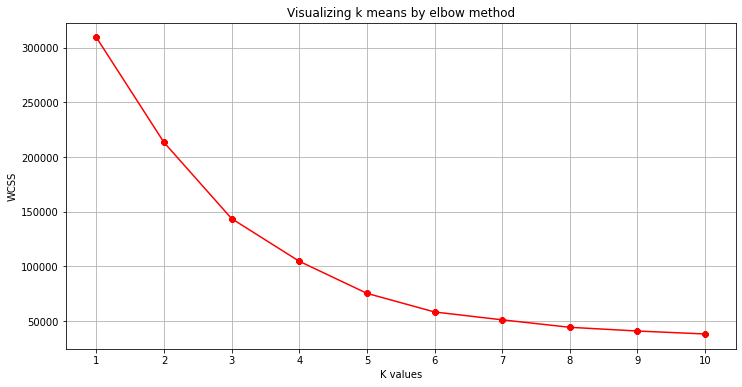

In [196]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    #initialize the algorithm for k=1
    km = KMeans(n_clusters = i)
    #fit algorithm
    km.fit(df)
    #inertia : sum of squares distanec of sample to their clossest clusters
    wcss.append(km.inertia_)

plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11), wcss, c='r', marker='8')
plt.xticks(np.arange(1,11,1))
plt.xlabel('K values')
plt.ylabel('WCSS')
plt.title('Visualizing k means by elbow method')
plt.show()

### The Elbow Method
Calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS first starts to diminish. In the plot of WSS-versus k, this is visible as an elbow.

The optimal K value is found to be using the elbow method.

In [206]:
km.inertia_

38276.93210547623

In [162]:
km.labels_

array([7, 0, 4, 0, 7, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 7, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3, 0, 3, 7,
       4, 7, 3, 7, 7, 7, 3, 7, 7, 3, 3, 3, 3, 3, 7, 3, 3, 7, 3, 3, 3, 7,
       6, 3, 7, 7, 3, 6, 3, 3, 3, 8, 6, 6, 8, 6, 3, 6, 3, 6, 8, 6, 3, 8,
       8, 6, 3, 8, 6, 6, 8, 8, 6, 8, 6, 8, 8, 6, 3, 8, 6, 8, 3, 6, 3, 3,
       3, 8, 6, 8, 8, 8, 3, 6, 6, 6, 8, 6, 6, 5, 8, 5, 6, 5, 1, 5, 1, 5,
       8, 5, 1, 5, 1, 5, 1, 5, 1, 5, 8, 5, 1, 5, 6, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 6, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 9, 2, 9, 2, 9, 2, 9, 2, 9, 2, 9, 2, 9, 2, 9, 2, 9, 2,
       9, 2])

In [164]:
km

KMeans(algorithm='full', n_clusters=10)

In [170]:
k = KMeans(n_clusters=5)
clusters = k.fit_predict(df)
df['label'] = clusters
clusters

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

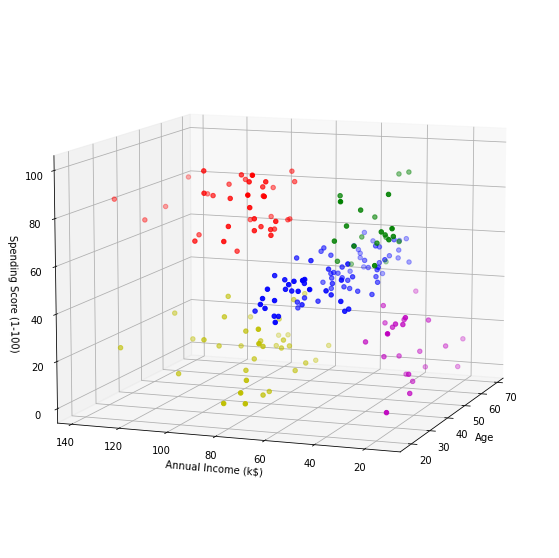

In [187]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure( figsize = (20,10))
ax = fig.add_subplot(111, projection ='3d')
ax.scatter(df.Age[ df.label==0 ], df['Annual Income (k$)'][ df.label==0 ], df['Spending Score (1-100)'][ df.label==0 ], c='b')
ax.scatter(df.Age[ df.label==1 ], df['Annual Income (k$)'][ df.label==1 ], df['Spending Score (1-100)'][ df.label==1 ], c='g')
ax.scatter(df.Age[ df.label==2 ], df['Annual Income (k$)'][ df.label==2 ], df['Spending Score (1-100)'][ df.label==2 ], c='y')
ax.scatter(df.Age[ df.label==3 ], df['Annual Income (k$)'][ df.label==3 ], df['Spending Score (1-100)'][ df.label==3 ], c='r')
ax.scatter(df.Age[ df.label==4 ], df['Annual Income (k$)'][ df.label==4 ], df['Spending Score (1-100)'][ df.label==4 ], c='m')

ax.view_init(10,200)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

### Conculusion :
We get the labels ranging from 1 to 5 in our data frame. This makes our analyze segmentation of customers to get a better understanding of them which in turn could be used to increase the revenue of the company.